# LABORATORIO 4 - Regularizacion - Regresion logistica

Para la implementación de la regresión logística se usó el dataset "Phising Dataset". Este conjunto de datos ofrece información crucial para detectar y analizar dominios de phishing integrados en las URL. Abarca una amplia gama de funciones extraídas de las URL, lo que refuerza significativamente la capacidad de descubrir posibles intentos de phishing.

Énlace: https://www.kaggle.com/datasets/simaanjali/tes-upload

Enlace github:


# Procesamiento de datos


Dado que la "y" a usar no está con 0 y 1 sino que con 0.0 y 1.0 se usó la librería pandas para procesar la "y"(en este caso la columna llamada Phising) y corregir esos valores, además de elimar todas las filas donde "Phising" sea Nan.

In [1]:
import pandas as pd

In [2]:
# Leer datos
df = pd.read_csv('/content/drive/MyDrive/SIS420/datasets/Phising_dataset_predict.csv', delimiter=',')

In [3]:
# Verifica los valores únicos en la columna 'Phishing'
unique_values = df['Phising'].unique()

# Encuentra los valores que no son ni 1.0 ni 0.0
other_values = set(unique_values) - {1.0, 0.0}

if other_values:
    print("La columna 'Phising' contiene otros valores además de 1.0 y 0.0:")
    for value in other_values:
        print(value)
else:
    print("La columna 'Phising' solo contiene valores de 1.0 y 0.0.")

La columna 'Phising' contiene otros valores además de 1.0 y 0.0:
nan


In [4]:
# Obtener la cantidad de datos no nulos en cada columna antes de eliminar NaN en 'Phising'
column_counts_before = df.count()

# Imprimir la cantidad de datos en cada columna antes de eliminar NaN en 'Phising'
print("Cantidad de datos en cada columna antes de eliminar NaN en 'Phising':")
print(column_counts_before)

Cantidad de datos en cada columna antes de eliminar NaN en 'Phising':
Unnamed: 0            662591
NumDots               662591
UrlLength             662591
AtSymbol              662591
NumDash               662591
NumPercent            662591
NumQueryComponents    662591
IpAddress             662591
HttpsInHostname       662591
PathLevel             662591
PathLength            662591
NumNumericChars       662591
Phising               630071
dtype: int64


In [5]:
# Eliminar las filas donde 'Phising' es NaN
df_cleaned = df.dropna(subset=['Phising'])

# Verificar si quedan valores NaN en el DataFrame limpio
print("Número de valores NaN después de eliminar:", df_cleaned['Phising'].isna().sum())


Número de valores NaN después de eliminar: 0


In [6]:
# Obtener la cantidad de datos no nulos en cada columna después de eliminar NaN en 'Phising'
column_counts_after = df_cleaned.count()

# Imprimir la cantidad de datos en cada columna después de eliminar NaN en 'Phising'
print("Cantidad de datos en cada columna después de eliminar NaN en 'Phising':")
print(column_counts_after)


Cantidad de datos en cada columna después de eliminar NaN en 'Phising':
Unnamed: 0            630071
NumDots               630071
UrlLength             630071
AtSymbol              630071
NumDash               630071
NumPercent            630071
NumQueryComponents    630071
IpAddress             630071
HttpsInHostname       630071
PathLevel             630071
PathLength            630071
NumNumericChars       630071
Phising               630071
dtype: int64


In [7]:
# Convertir 1.0 a 1 y 0.0 a 0 en la columna 'Phising'
df_cleaned['Phising'] = df_cleaned['Phising'].replace({1.0: 1, 0.0: 0})

# Verificar los valores únicos después de la conversión
print("Valores únicos en la columna 'Phising' después de la conversión:")
print(df_cleaned['Phising'].unique())

Valores únicos en la columna 'Phising' después de la conversión:
[1. 0.]


<ipython-input-7-7583e64c72d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Phising'] = df_cleaned['Phising'].replace({1.0: 1, 0.0: 0})


In [8]:
# Convertir 1.0 a 1 y 0.0 a 0 en la columna 'Phising'
df_cleaned.loc[:, 'Phising'] = df_cleaned['Phising'].replace({1.0: 1, 0.0: 0})

# Verificar los valores únicos después de la conversión
print("Valores únicos en la columna 'Phising' después de la conversión:")
print(df_cleaned['Phising'].unique())

Valores únicos en la columna 'Phising' después de la conversión:
[1. 0.]


<ipython-input-8-dd4728147ffd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'Phising'] = df_cleaned['Phising'].replace({1.0: 1, 0.0: 0})


In [9]:
# Imprimir las primeras filas del DataFrame
print(df_cleaned.head())

   Unnamed: 0  NumDots  UrlLength  AtSymbol  NumDash  NumPercent  \
0           0        3         72         0        0           0   
1           1        3        144         0        0           0   
2           2        3         58         0        0           0   
3           3        3         79         0        1           0   
4           4        3         46         0        0           0   

   NumQueryComponents  IpAddress  HttpsInHostname  PathLevel  PathLength  \
0                   0          0                0          5          44   
1                   2          0                0          3          16   
2                   0          0                0          2          24   
3                   0          0                0          6          50   
4                   0          0                0          4          29   

   NumNumericChars  Phising  
0                0      1.0  
1               41      1.0  
2                0      1.0  
3             

In [10]:
# Convertir 1.0 a 1 y 0.0 a 0 en la columna 'Phising' directamente en el DataFrame original
df['Phising'].replace({1.0: 1, 0.0: 0}, inplace=True)

# Verificar los valores únicos después de la conversión
print("Valores únicos en la columna 'Phising' después de la conversión:")
print(df['Phising'].unique())

Valores únicos en la columna 'Phising' después de la conversión:
[ 1.  0. nan]


In [11]:
# Imprimir las primeras filas del DataFrame
print(df_cleaned.head())

   Unnamed: 0  NumDots  UrlLength  AtSymbol  NumDash  NumPercent  \
0           0        3         72         0        0           0   
1           1        3        144         0        0           0   
2           2        3         58         0        0           0   
3           3        3         79         0        1           0   
4           4        3         46         0        0           0   

   NumQueryComponents  IpAddress  HttpsInHostname  PathLevel  PathLength  \
0                   0          0                0          5          44   
1                   2          0                0          3          16   
2                   0          0                0          2          24   
3                   0          0                0          6          50   
4                   0          0                0          4          29   

   NumNumericChars  Phising  
0                0      1.0  
1               41      1.0  
2                0      1.0  
3             

In [12]:
print(df['Phising'])

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
662586    1.0
662587    1.0
662588    1.0
662589    1.0
662590    1.0
Name: Phising, Length: 662591, dtype: float64


In [13]:
# Eliminar valores NaN de la columna 'Phising'
df_cleaned = df.dropna(subset=['Phising'])

# Convertir 1.0 a 1 y 0.0 a 0 en la columna 'Phising'
df_cleaned['Phising'] = df_cleaned['Phising'].replace({1.0: 1, 0.0: 0})

# Cambiar el tipo de datos de la columna 'Phising' a entero
df_cleaned['Phising'] = df_cleaned['Phising'].astype(int)

# Imprimir la columna 'Phising' después de la conversión
print(df_cleaned['Phising'])


0         1
1         1
2         1
3         1
4         1
         ..
662586    1
662587    1
662588    1
662589    1
662590    1
Name: Phising, Length: 630071, dtype: int64


<ipython-input-13-1cd874edd6b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Phising'] = df_cleaned['Phising'].replace({1.0: 1, 0.0: 0})
<ipython-input-13-1cd874edd6b2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Phising'] = df_cleaned['Phising'].astype(int)


In [14]:
print(df_cleaned['Phising'])

0         1
1         1
2         1
3         1
4         1
         ..
662586    1
662587    1
662588    1
662589    1
662590    1
Name: Phising, Length: 630071, dtype: int64


Una vez procesados los datos tenemos un nuevo dataframe llamado df_cleaned que se usará para la aplicación de la regresión logistica. En este dataframe se usan solo 9 X.

X = 'NumDots', 'UrlLength', 'AtSymbol', 'NumDash', 'NumPercent', 'NumQueryComponents', 'PathLevel', 'PathLength', 'NumNumericChars'

y = 'Phising'

In [15]:
# Verificar los tipos de datos en el dataframe
print("\nTipos de datos en el dataframe:")
print(df_cleaned.dtypes)

# Verificar si hay valores nulos en el dataframe
print("\nValores nulos en el dataframe:")
print(df_cleaned.isnull().sum())


Tipos de datos en el dataframe:
Unnamed: 0            int64
NumDots               int64
UrlLength             int64
AtSymbol              int64
NumDash               int64
NumPercent            int64
NumQueryComponents    int64
IpAddress             int64
HttpsInHostname       int64
PathLevel             int64
PathLength            int64
NumNumericChars       int64
Phising               int64
dtype: object

Valores nulos en el dataframe:
Unnamed: 0            0
NumDots               0
UrlLength             0
AtSymbol              0
NumDash               0
NumPercent            0
NumQueryComponents    0
IpAddress             0
HttpsInHostname       0
PathLevel             0
PathLength            0
NumNumericChars       0
Phising               0
dtype: int64


# Librerias usadas para regresión logistica

In [16]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

from tabulate import tabulate

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

# Visualización de datos

No se usan todas las columnas del dataset pues no son relevantes, solo se usan 9 y para "y" se usa la columna Phising. Además se usa el 80% del dataset para entrenar y 20% para testear.

In [32]:
# columnas relevantes para X
features = ['NumDots', 'UrlLength', 'AtSymbol', 'NumDash', 'NumPercent', 'NumQueryComponents', 'PathLevel', 'PathLength', 'NumNumericChars']
X = df_cleaned[features].values

# Phising' para y
y = df_cleaned['Phising'].values

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size = int(0.8 * len(df_cleaned))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Asignar X_train y y_train a X y y respectivamente
X = X_train
y = y_train
m_train = len(y_train)

train_dataset = {
    'X': X_train,
    'y': y_train,
    'm_train': len(y_train)
}

test_dataset = {
    'X': X[train_size:],
    'y': y[train_size:]
}



# Imprimir los datos de entrenamiento y prueba
print("Datos de entrenamiento:")
print(X_train)
print(y_train)
print("Datos de prueba:")
print(X_test)
print(y_test)

Datos de entrenamiento:
[[  3  72   0 ...   5  44   0]
 [  3 144   0 ...   3  16  41]
 [  3  58   0 ...   2  24   0]
 ...
 [  4 104   0 ...   1  10   1]
 [  2 195   0 ...   1  10   1]
 [  3 101   0 ...   1  11   1]]
[1 1 1 ... 0 0 0]
Datos de prueba:
[[ 1 36  0 ...  4 36  1]
 [ 2 66  0 ...  5 66  1]
 [ 3 45  0 ...  3 45  0]
 ...
 [ 2 42  0 ...  4 42  1]
 [ 2 45  0 ...  3 45  0]
 [ 2 41  0 ...  3 41  0]]
[0 0 0 ... 1 1 1]


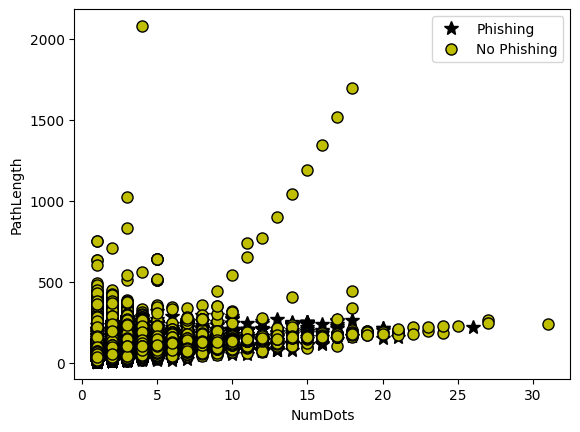

In [18]:
def plotData(X, y):
    # Grafica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Encuentra los índices de ejemplos positivos y negativos
    pos = y == 1
    neg = y == 0

    # Grafica ejemplos positivos
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10, label='Phishing')

    # Grafica ejemplos negativos
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1, label='No Phishing')

    # Etiqueta los ejes
    pyplot.xlabel('NumDots')
    pyplot.ylabel('PathLength')

    # Agrega una leyenda
    pyplot.legend()

    # Muestra la gráfica
    pyplot.show()

# Llama a la función para visualizar los datos
plotData(X, y)



# Normalización de características

Los datos de las X están en diferente escalas y deben ser normalizadas

In [19]:
def featureNormalize(X):
    # Hace una copia de X
    X_norm = X.copy()

    # Inicializa mu y sigma con ceros
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # Calcula la media y la desviación estándar de cada característica
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)

    sigma[sigma == 0] = 1

    # Normaliza cada característica
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [20]:
# Llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_train)

# imprimir todas las X_norm de datos solo 10 ejemplos
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]'
))
print('-' * 85)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7] X[:, 8]
-------------------------------------------------------------------------------------
   0.899   0.333    -0.027    -0.561  -0.096  -0.497   1.445   0.120  -0.414
   0.899   2.185    -0.027    -0.561  -0.096   3.817   0.166  -0.887  24.960
   0.899  -0.027    -0.027    -0.561  -0.096  -0.497  -0.473  -0.599  -0.414
   0.899   0.513    -0.027    -0.250  -0.096  -0.497   2.085   0.335  -0.414
   0.899  -0.336    -0.027    -0.561  -0.096  -0.497   0.806  -0.420   0.824
   0.899  -0.439    -0.027    -0.250  -0.096  -0.497  -1.113  -1.031  -0.414
   0.037   0.024    -0.027    -0.561  -0.096  -0.497   1.445  -0.168   0.205
  -0.825  -0.748    -0.027    -0.561  -0.096  -0.497   0.166  -1.067   1.442
   5.208   0.436    -0.027    -0.250  -0.096  -0.497  -0.473  -1.318   0.824
   0.037  -0.336    -0.027    -0.561  -0.096  -0.497  -0.473  -0.563  -0.414


In [21]:
# Concatenar una columna de unos al inicio de X_norm
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

# Imprimir los nombres de las características
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]'
))
print('-' * 130)

# Imprimir solo 10 ejemplos de X_norm
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}'.format(
        X_ready[i, 0], X_ready[i, 1], X_ready[i, 2], X_ready[i, 3], X_ready[i, 4], X_ready[i, 5], X_ready[i, 6], X_ready[i, 7], X_ready[i, 8], X_ready[i, 9]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7] X[:, 8] X[:, 9]
----------------------------------------------------------------------------------------------------------------------------------
   1.000   0.899     0.333    -0.027  -0.561  -0.096  -0.497   1.445   0.120  -0.414
   1.000   0.899     2.185    -0.027  -0.561  -0.096   3.817   0.166  -0.887  24.960
   1.000   0.899    -0.027    -0.027  -0.561  -0.096  -0.497  -0.473  -0.599  -0.414
   1.000   0.899     0.513    -0.027  -0.250  -0.096  -0.497   2.085   0.335  -0.414
   1.000   0.899    -0.336    -0.027  -0.561  -0.096  -0.497   0.806  -0.420   0.824
   1.000   0.899    -0.439    -0.027  -0.250  -0.096  -0.497  -1.113  -1.031  -0.414
   1.000   0.037     0.024    -0.027  -0.561  -0.096  -0.497   1.445  -0.168   0.205
   1.000  -0.825    -0.748    -0.027  -0.561  -0.096  -0.497   0.166  -1.067   1.442
   1.000   5.208     0.436    -0.027  -0.250  -0.096  -0.497  -0.473  -1.318   0.824
   1.000   0.037   

# Función Sigmoidea

In [22]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # Convierte la entrada a un arreglo numpy
    z = np.array(z)

    # Inicializa un arreglo de ceros con la misma forma que z
    g = np.zeros(z.shape)

    # Calcula la sigmoide
    g = 1 / (1 + np.exp(-z))

    return g

# Prueba la implementación de la función sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)


g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


# Calculo costo/descenso gradiente CON regularizacion

In [23]:
def calcularCostoCR(theta, X, y, lambda_):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0

    # temp = theta.copy()
    # temp[0] = 0

    #hacemos el uso de la funcion sigmoid
    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    # Calculamos el término de regularización (sin incluir el primer término de theta)
    regularization_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    # Sumamos el término de regularización al costo total
    J += regularization_term

    return J

In [24]:
def descensoGradienteCR(theta, X, y, alpha, lambda_, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))

        # Calcula el gradiente descendente sin regularización
        gradient = (1 / m) * X.T.dot(h - y)

        # Calcula el término de regularización (excepto para el término de sesgo theta[0])
        regularization_term = (lambda_ / m) * theta[1:]

        # theta[0] -= alpha * (1 / m) * np.sum(h - y)
        theta[0] -= alpha * gradient[0]
        theta[1:] -= alpha * (gradient[1:]+ regularization_term)

        # Calcula y guarda el costo en cada iteración
        J_history.append(calcularCostoCR(theta, X, y, lambda_))

    return theta, J_history

# Calculo costo/descenso gradiente SIN regularizacion

In [25]:
def calcularCostoSR(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0

    #hacemos el uso de la funcion sigmoid
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [26]:
def descensoGradienteSR(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCostoSR(theta, X, y))
    return theta, J_history

# Aplicacion de la regularizacion

In [72]:

#test
X_testCR = X_test.copy()
y_testCR = y_test.copy()
m_test_CR = len(y_testCR)

#entrenamiento
X_trainCR = X_train.copy()
y_trainCR = y_train.copy()
m_train_CR = len(y_trainCR)

print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'Y'
))
print('-' * 110)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}'.format(
        X_trainCR[i, 0],
        X_trainCR[i, 1],
        X_trainCR[i, 2],
        X_trainCR[i, 3],
        X_trainCR[i, 4],
        X_trainCR[i, 5],
        X_trainCR[i, 6],
        X_trainCR[i, 7],
        X_trainCR[i, 8],
        y_trainCR[i]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]         Y
--------------------------------------------------------------------------------------------------------------
       3      72         0         0       0       0       5      44       0         1
       3     144         0         0       0       2       3      16      41         1
       3      58         0         0       0       0       2      24       0         1
       3      79         0         1       0       0       6      50       0         1
       3      46         0         0       0       0       4      29       2         1
       3      42         0         1       0       0       1      12       0         1
       2      60         0         0       0       0       5      36       1         1
       1      30         0         0       0       0       3      11       3         1
       8      76         0         1       0       0       2       4       2         1
       2      46    

Normalizacion de las caracteristicas

Se hace uso de la funcion de `featureNormalize(X) ` donde se recibe un parametro de tipo matriz para normalizar cada dato dentro de ella, retornandome la **matriz normalizda**, **sigma(desviacion estandar)**, y mi **mu(media)**.

Almacenando los datos normalizados en **X_norm** usando la funcion **featureNormaliza()**, normalizando los datos de X_train

In [75]:
X_norm_CR, mu_CR, sigma_CR= featureNormalize(X_trainCR)


print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}'.format(
        X_norm_CR[i, 0],
        X_norm_CR[i, 1],
        X_norm_CR[i, 2],
        X_norm_CR[i, 3],
        X_norm_CR[i, 4],
        X_norm_CR[i, 5],
        X_norm_CR[i, 6],
        X_norm_CR[i, 7],
        X_norm_CR[i, 8],
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]
--------------------------------------------------------------------------------------------------------------
   0.899   0.333    -0.027    -0.561  -0.096  -0.497   1.445   0.120  -0.414
   0.899   2.185    -0.027    -0.561  -0.096   3.817   0.166  -0.887  24.960
   0.899  -0.027    -0.027    -0.561  -0.096  -0.497  -0.473  -0.599  -0.414
   0.899   0.513    -0.027    -0.250  -0.096  -0.497   2.085   0.335  -0.414
   0.899  -0.336    -0.027    -0.561  -0.096  -0.497   0.806  -0.420   0.824
   0.899  -0.439    -0.027    -0.250  -0.096  -0.497  -1.113  -1.031  -0.414
   0.037   0.024    -0.027    -0.561  -0.096  -0.497   1.445  -0.168   0.205
  -0.825  -0.748    -0.027    -0.561  -0.096  -0.497   0.166  -1.067   1.442
   5.208   0.436    -0.027    -0.250  -0.096  -0.497  -0.473  -1.318   0.824
   0.037  -0.336    -0.027    -0.561  -0.096  -0.497  -0.473  -0.563  -0.414


 columna de unos

In [41]:
X_ready_CR = np.concatenate([np.ones((m_train_CR, 1)), X_norm_CR], axis=1)

print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 130)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}'.format(
        X_ready_CR[i, 0],
        X_ready_CR[i, 1],
        X_ready_CR[i, 2],
        X_ready_CR[i, 3],
        X_ready_CR[i, 4],
        X_ready_CR[i, 5],
        X_ready_CR[i, 6],
        X_ready_CR[i, 7],
        X_ready_CR[i, 8],
        X_ready_CR[i, 9],
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
----------------------------------------------------------------------------------------------------------------------------------
   1.000   0.899     0.333    -0.027  -0.561  -0.096  -0.497   1.445   0.120    -0.414
   1.000   0.899     2.185    -0.027  -0.561  -0.096   3.817   0.166  -0.887    24.960
   1.000   0.899    -0.027    -0.027  -0.561  -0.096  -0.497  -0.473  -0.599    -0.414
   1.000   0.899     0.513    -0.027  -0.250  -0.096  -0.497   2.085   0.335    -0.414
   1.000   0.899    -0.336    -0.027  -0.561  -0.096  -0.497   0.806  -0.420     0.824
   1.000   0.899    -0.439    -0.027  -0.250  -0.096  -0.497  -1.113  -1.031    -0.414
   1.000   0.037     0.024    -0.027  -0.561  -0.096  -0.497   1.445  -0.168     0.205
   1.000  -0.825    -0.748    -0.027  -0.561  -0.096  -0.497   0.166  -1.067     1.442
   1.000   5.208     0.436    -0.027  -0.250  -0.096  -0.497  -0.47

####Descenso por el gradiente

Cálculo del costo



In [109]:
theta_CR=np.array([0.2, 3.0, 0.2,0.1, 3.0, 0.2,1.1, 2.0, 0.7,0.8])
theta_CR1=np.array([0.1, 2.0, 0.5,0.2, 8.0, 0.7,1.3, 8.0, 1.7,0.7])

lambda_ = 1000
print(theta_CR.shape[0])

print(f"con theta:{ theta_CR } se obtiene un costo de: {calcularCostoCR(theta_CR, X_ready_CR, y_trainCR, lambda_)}")
print(f"con theta:{ theta_CR1 } se obtiene un costo de: {calcularCostoCR(theta_CR ,X_ready_CR, y_trainCR, lambda_)}")

10
con theta:[0.2 3.  0.2 0.1 3.  0.2 1.1 2.  0.7 0.8] se obtiene un costo de: nan
con theta:[0.1 2.  0.5 0.2 8.  0.7 1.3 8.  1.7 0.7] se obtiene un costo de: nan


<ipython-input-23-32cadc5d225f>:13: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


In [110]:

theta_CR = np.zeros(len(X_ready_CR[0]))


num_ite_CR = 15000
alpha_CR = 0.0009
lambda_CR = 1000

theta_CR, J_historico_CR = descensoGradienteCR(theta_CR, X_ready_CR, y_trainCR, alpha_CR, lambda_CR, num_ite_CR)

print("Los valores de theta calculados son:")
i = 0
for tht in theta_CR:
    i += 1
    print(f"theta {i}: {tht}")


#Mehor costo
print(f"con un costo de: { J_historico_CR[-1]} ")

Los valores de theta calculados son:
theta 1: -2.023375594179319
theta 2: 0.19052678190720568
theta 3: -0.10978088516720527
theta 4: 0.006372597705137012
theta 5: -0.10227057294467712
theta 6: -0.0028325859389141932
theta 7: -0.21581078024209774
theta 8: -0.2354488224603836
theta 9: -0.12721641915439036
theta 10: 0.16516697179364748
con un costo de: 0.2479462688657452 


####Grafica convergencia del costo

Text(0, 0.5, 'Costo J')

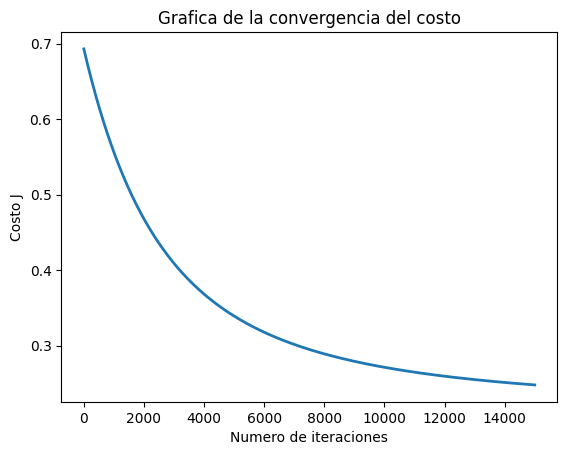

In [45]:
pyplot.plot(np.arange(len(J_historico_CR)), J_historico_CR, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

In [62]:
#prueba
X_array_CR = [1, 3, 39, 0, 0, 0, 0, 4, 39, 1]  # Datos del ejemplo
X_array_copy_CR = X_array_CR.copy()
#Se normaliza las caracteristicas
X_array_CR[1:] = (X_array_CR[1:] - mu_CR) / sigma_CR

resultados_CR = sigmoid(np.dot(X_array_CR, theta_CR))

print(f"Un link con caracteristicas: {X_array_copy_CR} ")
print(f'Tiene una probabilidad de ser phishing de: {resultados_CR * 100} %')

print(f"Con valores de theta: { theta_CR }")

Una persona con las caracteristicas: [1, 3, 39, 0, 0, 0, 0, 4, 39, 1] 
Tiene una probabilidad de ser phishing de: 14.44140625030062 %
Con valores de theta: [-2.02337559  0.19052678 -0.10978089  0.0063726  -0.10227057 -0.00283259
 -0.21581078 -0.23544882 -0.12721642  0.16516697]


#### Predicciones

In [54]:
nombres_columnas = [ 'NumDots', 'UrlLength', 'AtSymbol', 'NumDash', 'NumPercent', 'NumQueryComponents', 'PathLevel', 'PathLength', 'NumNumericChars','Phising', 'Phising(Si/No)']

matriz_datos_CR = np.array([
[3,72,0,0,0,0,5,44,0],
[3,144,0,0,0,2,3,16,41],
[3,58,0,0,0,0,2,24,0],
[3,79,0,1,0,0,6,50,0],
[3,46,0,0,0,0,4,29,2],

[2,150,1,0,0,0,6,42,56],
[9,45,0,0,0,3,10,32,0],
[8,78,2,1,0,0,5,96,1],
[1,80,0,0,1,0,2,50,9],
[0,99,1,0,0,0,1,74,6],
])

para_tabla = matriz_datos_CR.copy()
#creamos un vector parta almacenar cada Y predicha
y_pre_CR = []

matriz_datos_CR = (matriz_datos_CR- mu_CR) / sigma_CR
matriz_datos_CR = np.concatenate([np.ones((len(matriz_datos_CR), 1)), matriz_datos_CR], axis=1)

# Calculamos la Y predicha de los 11 ejemplos de prediccion
# Calculamos la Y predicha de cada fila de la matriz
for j in matriz_datos_CR:
    y_pre_CR.append(sigmoid(np.dot(j, theta_CR)))

# Convertimos la lista a un array unidimensional

y_pre_CR = np.array(y_pre_CR)

# usamos umbral para definir si tiene o no la enfermedad
y_pre_umbral_CR = (y_pre_CR >= 0.5).astype(int)

para_tabla = np.column_stack((para_tabla, y_pre_CR))
para_tabla = np.column_stack((para_tabla, y_pre_umbral_CR))
# Convertir la matriz en una lista de listas
datos_para_tabla = para_tabla.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+-----------+-------------+------------+-----------+--------------+----------------------+-------------+--------------+-------------------+-----------+------------------+
|   NumDots |   UrlLength |   AtSymbol |   NumDash |   NumPercent |   NumQueryComponents |   PathLevel |   PathLength |   NumNumericChars |   Phising |   Phising(Si/No) |
+===========+=============+============+===========+==============+======================+=============+==============+===================+===========+==================+
|         3 |          72 |          0 |         0 |            0 |                    0 |           5 |           44 |                 0 | 0.104521  |                0 |
+-----------+-------------+------------+-----------+--------------+----------------------+-------------+--------------+-------------------+-----------+------------------+
|         3 |         144 |          0 |         0 |            0 |                    2 |           3 |           16 |                41 | 0.792

In [55]:
X_norm_test_CR = (X_testCR- mu_CR) / sigma_CR
m_test= len(X_testCR)

In [63]:
X_test_ready_CR = np.concatenate([np.ones((m_test_CR, 1)), X_norm_test_CR], axis=1)

# x_norm
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]'
))
print('-' * 88)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}'.format(
    X_test_ready_CR[i, 0],
    X_test_ready_CR[i, 1],
    X_test_ready_CR[i, 2],
    X_test_ready_CR[i, 3],
    X_test_ready_CR[i, 4],
    X_test_ready_CR[i, 5],
    X_test_ready_CR[i, 6],
    X_test_ready_CR[i, 7],
    X_test_ready_CR[i, 8],
    X_test_ready_CR[i, 9]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7] X[:, 8]   X[:, 9]
----------------------------------------------------------------------------------------
   1.000  -0.825    -0.593    -0.027  -0.250  -0.096  -0.497   0.806  -0.168     0.205
   1.000   0.037     0.178    -0.027   0.372  -0.096  -0.497   1.445   0.910     0.205
   1.000   0.899    -0.362    -0.027   0.061  -0.096  -0.497   0.166   0.155    -0.414
   1.000   0.037    -1.082    -0.027  -0.561  -0.096  -0.497  -1.113  -0.851    -0.414
   1.000  -0.825    -1.134    -0.027  -0.561  -0.096  -0.497  -1.113  -0.923    -0.414
   1.000  -0.825     0.642    -0.027   0.994  -0.096  -0.497   1.445   1.557     0.205
   1.000  -0.825    -0.722    -0.027  -0.561  -0.096   1.660  -0.473  -0.851     0.205
   1.000   0.037     0.204    -0.027   0.372  -0.096  -0.497  -0.473   0.946     0.205
   1.000  -0.825    -0.979    -0.027  -0.561  -0.096  -0.497  -1.113  -0.707    -0.414
   1.000  -0.825    -0.722    -0.027  -0.

In [59]:
y_predicha_CR =[]
# Calculamos la Y predicha de cada fila de la matriz
for dato in X_test_ready_CR:
    y_predicha_CR.append(sigmoid(np.dot(dato, theta_CR.T)))

# Convertimos la lista a un array unidimensional
y_predicha_CR = np.array(y_predicha_CR)

#usando el umbral donde todo aquello que sea >= 0.5 sera 1, y si es menor sera 0
y_umbral_CR = (y_predicha_CR >= 0.5).astype(int)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'Y_predicha'
))

print('-' * 100)

#Mostrando algunos datos
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}'.format(
    X_test_ready_CR[i, 0],
    X_test_ready_CR[i, 1],
    X_test_ready_CR[i, 2],
    X_test_ready_CR[i, 3],
    X_test_ready_CR[i, 4],
    X_test_ready_CR[i, 5],
    X_test_ready_CR[i, 6],
    X_test_ready_CR[i, 7],
    X_test_ready_CR[i, 8],
    y_predicha_CR[i],
    y_umbral_CR[i]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]Y_predicha
----------------------------------------------------------------------------------------------------
   1.000  -0.825    -0.593    -0.027  -0.250  -0.096  -0.497   0.806  -0.168   0.107
   1.000   0.037     0.178    -0.027   0.372  -0.096  -0.497   1.445   0.910   0.084
   1.000   0.899    -0.362    -0.027   0.061  -0.096  -0.497   0.166   0.155   0.137
   1.000   0.037    -1.082    -0.027  -0.561  -0.096  -0.497  -1.113  -0.851   0.193
   1.000  -0.825    -1.134    -0.027  -0.561  -0.096  -0.497  -1.113  -0.923   0.171
   1.000  -0.825     0.642    -0.027   0.994  -0.096  -0.497   1.445   1.557   0.060
   1.000  -0.825    -0.722    -0.027  -0.561  -0.096   1.660  -0.473  -0.851   0.104
   1.000   0.037     0.204    -0.027   0.372  -0.096  -0.497  -0.473   0.946   0.125
   1.000  -0.825    -0.979    -0.027  -0.561  -0.096  -0.497  -1.113  -0.707   0.165
   1.000  -0.825    -0.722    -0.027  -0.561  -0.096   

####Precision del entrenamiento:

In [64]:
print('Precisión de entrenamiento: {:.5f} %'.format(np.mean(y_umbral_CR == y_testCR) * 100))

Precisión de entrenamiento: 49.22509 %


# Sin regularizacion

## Regresion Logistica


In [80]:

X_testSR = X_test.copy()
y_testSR = y_test.copy()
m_test_SR = len(y_testSR)


X_trainSR = X_train.copy()
y_trainSR = y_train.copy()
m_train_SR = len(y_trainSR)

print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'Y'
))
print('-' * 110)

for i in range(9):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}'.format(
        X_trainSR[i, 0],
        X_trainSR[i, 1],
        X_trainSR[i, 2],
        X_trainSR[i, 3],
        X_trainSR[i, 4],
        X_trainSR[i, 5],
        X_trainSR[i, 6],
        X_trainSR[i, 7],
        X_trainSR[i, 8],
        y_trainSR[i]
    ))

print('La cantidad total de ejemplos es de: {:.0f} de ejemplos'.format( len(df)))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]         Y
--------------------------------------------------------------------------------------------------------------
       3      72         0         0       0       0       5      44       0         1
       3     144         0         0       0       2       3      16      41         1
       3      58         0         0       0       0       2      24       0         1
       3      79         0         1       0       0       6      50       0         1
       3      46         0         0       0       0       4      29       2         1
       3      42         0         1       0       0       1      12       0         1
       2      60         0         0       0       0       5      36       1         1
       1      30         0         0       0       0       3      11       3         1
       8      76         0         1       0       0       2       4       2         1
La cantidad total de

##Normalizacion de las caracteristicas

In [83]:
X_norm_SR, mu_SR, sigma_SR= featureNormalize(X_trainSR)


print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}'.format(
        X_norm_SR[i, 0],
        X_norm_SR[i, 1],
        X_norm_SR[i, 2],
        X_norm_SR[i, 3],
        X_norm_SR[i, 4],
        X_norm_SR[i, 5],
        X_norm_SR[i, 6],
        X_norm_SR[i, 7],
        X_norm_SR[i, 8],

    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]
--------------------------------------------------------------------------------------------------------------
   0.899   0.333    -0.027    -0.561  -0.096  -0.497   1.445   0.120  -0.414
   0.899   2.185    -0.027    -0.561  -0.096   3.817   0.166  -0.887  24.960
   0.899  -0.027    -0.027    -0.561  -0.096  -0.497  -0.473  -0.599  -0.414
   0.899   0.513    -0.027    -0.250  -0.096  -0.497   2.085   0.335  -0.414
   0.899  -0.336    -0.027    -0.561  -0.096  -0.497   0.806  -0.420   0.824
   0.899  -0.439    -0.027    -0.250  -0.096  -0.497  -1.113  -1.031  -0.414
   0.037   0.024    -0.027    -0.561  -0.096  -0.497   1.445  -0.168   0.205
  -0.825  -0.748    -0.027    -0.561  -0.096  -0.497   0.166  -1.067   1.442
   5.208   0.436    -0.027    -0.250  -0.096  -0.497  -0.473  -1.318   0.824
   0.037  -0.336    -0.027    -0.561  -0.096  -0.497  -0.473  -0.563  -0.414


In [93]:
X_ready_SR = np.concatenate([np.ones((m_train_SR, 1)), X_norm_SR], axis=1)

print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]'
))
print('-' * 130)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}'.format(
        X_ready_SR[i, 0],
        X_ready_SR[i, 1],
        X_ready_SR[i, 2],
        X_ready_SR[i, 3],
        X_ready_SR[i, 4],
        X_ready_SR[i, 5],
        X_ready_SR[i, 6],
        X_ready_SR[i, 7],
        X_ready_SR[i, 8],
        X_ready_SR[i, 9]

    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]
----------------------------------------------------------------------------------------------------------------------------------
   1.000   0.899     0.333    -0.027  -0.561  -0.096  -0.497   1.445   0.120    -0.414
   1.000   0.899     2.185    -0.027  -0.561  -0.096   3.817   0.166  -0.887    24.960
   1.000   0.899    -0.027    -0.027  -0.561  -0.096  -0.497  -0.473  -0.599    -0.414
   1.000   0.899     0.513    -0.027  -0.250  -0.096  -0.497   2.085   0.335    -0.414
   1.000   0.899    -0.336    -0.027  -0.561  -0.096  -0.497   0.806  -0.420     0.824
   1.000   0.899    -0.439    -0.027  -0.250  -0.096  -0.497  -1.113  -1.031    -0.414
   1.000   0.037     0.024    -0.027  -0.561  -0.096  -0.497   1.445  -0.168     0.205
   1.000  -0.825    -0.748    -0.027  -0.561  -0.096  -0.497   0.166  -1.067     1.442
   1.000   5.208     0.436    -0.027  -0.250  -0.096  -0.497  -0.473  -1.318     0.824


##Descenso por el gradiente


In [94]:

theta_SR = np.zeros(len(X_ready_SR[0]))


num_ite_SR = 15000
alpha_SR = 0.0009

theta_SR, J_historico_SR = descensoGradienteSR(theta_SR, X_ready_SR, y_trainSR, alpha_SR, num_ite_SR)

print("Los valores de theta calculados son:")
i = 0
for tht_SR in theta_SR:
    i += 1
    print(f"theta {i}: {tht_SR}")



print(f"mejor costo: { J_historico_SR[-1]} ")

########################################################################################################
Los valores de theta calculados son:
theta 1: -2.023767300338994
theta 2: 0.19239795801768333
theta 3: -0.11063962701327221
theta 4: 0.006465257148389579
theta 5: -0.10294586803182099
theta 6: -0.002691341391779771
theta 7: -0.21840515033970442
theta 8: -0.23768999954065223
theta 9: -0.128126126550468
theta 10: 0.16698035597325808
########################################################################################################
con un costo de: 0.2476111141342808 


##Grafica convergencia del costo


Text(0, 0.5, 'Costo J')

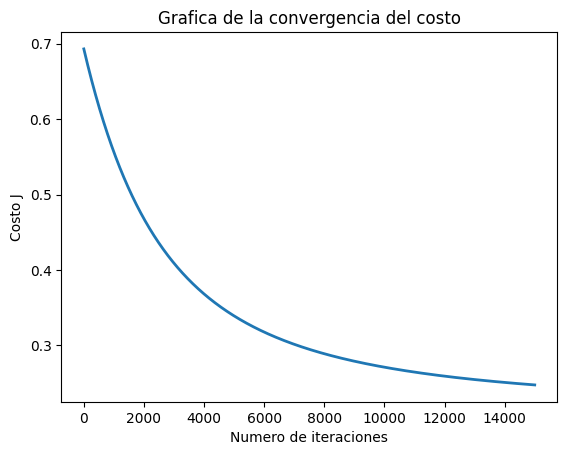

In [95]:
pyplot.plot(np.arange(len(J_historico_SR)), J_historico_SR, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

In [97]:
X_array_SR = [1, 3, 39, 0, 0, 0, 0, 4, 39, 1]
X_array_copy_SR = X_array_SR.copy()
#Se normaliza las caracteristicas para la prueba. haciendo el uso de mu y sigma calculados anteriormente, solamente los valores despues del primero, porque este es el 1.
X_array_SR[1:] = (X_array_SR[1:] - mu_SR) / sigma_SR

resultados_SR = sigmoid(np.dot(X_array_SR, theta_SR))

print(f"Un link con caracteristicas: {X_array_copy_SR} ")
print(f'Tiene una probabilidad de ser phishing de: {resultados_SR * 100} %')

print(f"Con valores de theta: { theta_SR }")

Una persona con las caracteristicas: [1, 3, 39, 0, 0, 0, 0, 4, 39, 1] 
Tiene una probabilidad de tener diabetes de: 14.466191183115704 %
Con valores de theta: [-2.0237673   0.19239796 -0.11063963  0.00646526 -0.10294587 -0.00269134
 -0.21840515 -0.23769    -0.12812613  0.16698036]


In [100]:
nombres_columnas = [ 'NumDots', 'UrlLength', 'AtSymbol', 'NumDash', 'NumPercent', 'NumQueryComponents', 'PathLevel', 'PathLength', 'NumNumericChars','Phising', 'Phising(Si/No)']

matriz_datos_SR = np.array([
[3,72,0,0,0,0,5,44,0],
[3,144,0,0,0,2,3,16,41],
[3,58,0,0,0,0,2,24,0],
[3,79,0,1,0,0,6,50,0],
[3,46,0,0,0,0,4,29,2],

[2,150,1,0,0,0,6,42,56],
[9,45,0,0,0,3,10,32,0],
[8,78,2,1,0,0,5,96,1],
[1,80,0,0,1,0,2,50,9],
[0,99,1,0,0,0,1,74,6],
])

para_tabla = matriz_datos_SR.copy()
#creamos un vector parta almacenar cada Y predicha
y_pre_SR = []

matriz_datos_SR = (matriz_datos_SR- mu_SR) / sigma_SR
matriz_datos_SR = np.concatenate([np.ones((len(matriz_datos_SR), 1)), matriz_datos_SR], axis=1)

# Calculamos la Y predicha de los 11 ejemplos de prediccion
# Calculamos la Y predicha de cada fila de la matriz
for j in matriz_datos_SR:
    y_pre_SR.append(sigmoid(np.dot(j, theta_SR)))

# Convertimos la lista a un array unidimensional

y_pre_SR = np.array(y_pre_SR)

# usamos umbral para definir si tiene o no la enfermedad
y_pre_umbral_SR = (y_pre_SR >= 0.5).astype(int)

para_tabla = np.column_stack((para_tabla, y_pre_SR))
para_tabla = np.column_stack((para_tabla, y_pre_umbral_SR))
# Convertir la matriz en una lista de listas
datos_para_tabla = para_tabla.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+-----------+-------------+------------+-----------+--------------+----------------------+-------------+--------------+-------------------+-----------+------------------+
|   NumDots |   UrlLength |   AtSymbol |   NumDash |   NumPercent |   NumQueryComponents |   PathLevel |   PathLength |   NumNumericChars |   Phising |   Phising(Si/No) |
+===========+=============+============+===========+==============+======================+=============+==============+===================+===========+==================+
|         3 |          72 |          0 |         0 |            0 |                    0 |           5 |           44 |                 0 | 0.104386  |                0 |
+-----------+-------------+------------+-----------+--------------+----------------------+-------------+--------------+-------------------+-----------+------------------+
|         3 |         144 |          0 |         0 |            0 |                    2 |           3 |           16 |                41 | 0.797

##Predicciones

In [101]:
X_norm_test_SR = (X_testSR- mu_SR) / sigma_SR

In [103]:
X_test_ready_SR = np.concatenate([np.ones((m_test_SR, 1)), X_norm_test_SR], axis=1)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}'.format(
    X_test_ready_SR[i, 0],
    X_test_ready_SR[i, 1],
    X_test_ready_SR[i, 2],
    X_test_ready_SR[i, 3],
    X_test_ready_SR[i, 4],
    X_test_ready_SR[i, 5],
    X_test_ready_SR[i, 6],
    X_test_ready_SR[i, 7],
    X_test_ready_SR[i, 8],
    X_test_ready_SR[i, 9]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]
--------------------------------------------------------------------------------------------------------------
   1.000  -0.825    -0.593    -0.027  -0.250  -0.096  -0.497   0.806  -0.168     0.205
   1.000   0.037     0.178    -0.027   0.372  -0.096  -0.497   1.445   0.910     0.205
   1.000   0.899    -0.362    -0.027   0.061  -0.096  -0.497   0.166   0.155    -0.414
   1.000   0.037    -1.082    -0.027  -0.561  -0.096  -0.497  -1.113  -0.851    -0.414
   1.000  -0.825    -1.134    -0.027  -0.561  -0.096  -0.497  -1.113  -0.923    -0.414
   1.000  -0.825     0.642    -0.027   0.994  -0.096  -0.497   1.445   1.557     0.205
   1.000  -0.825    -0.722    -0.027  -0.561  -0.096   1.660  -0.473  -0.851     0.205
   1.000   0.037     0.204    -0.027   0.372  -0.096  -0.497  -0.473   0.946     0.205
   1.000  -0.825    -0.979    -0.027  -0.561  -0.096  -0.497  -1.113  -0.707    -0.414
   1.000  -0.825    

In [107]:
y_predicha_SR =[]
# Calculamos la Y predicha de cada fila de la matriz
for dato in X_test_ready_SR:
    y_predicha_SR.append(sigmoid(np.dot(dato, theta_SR.T)))

# Convertimos la lista a un array unidimensional
y_predicha_SR = np.array(y_predicha_SR)

#usando el umbral donde todo aquello que sea >= 0.5 sera 1, y si es menor sera 0
y_umbral_SR = (y_predicha_SR >= 0.5).astype(int)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]','y','(y) usando el umbral'
))
print('-' * 140)

#Mostrando algunos datos
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}'.format(
    X_test_ready_SR[i, 0],
    X_test_ready_SR[i, 1],
    X_test_ready_SR[i, 2],
    X_test_ready_SR[i, 3],
    X_test_ready_SR[i, 4],
    X_test_ready_SR[i, 5],
    X_test_ready_SR[i, 6],
    X_test_ready_SR[i, 7],
    X_test_ready_SR[i, 8],
    y_predicha_CR[i],
    y_umbral_CR[i]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]         y(y) usando el umbral
--------------------------------------------------------------------------------------------------------------------------------------------
   1.000  -0.825    -0.593    -0.027  -0.250  -0.096  -0.497   0.806  -0.168
   1.000   0.037     0.178    -0.027   0.372  -0.096  -0.497   1.445   0.910
   1.000   0.899    -0.362    -0.027   0.061  -0.096  -0.497   0.166   0.155
   1.000   0.037    -1.082    -0.027  -0.561  -0.096  -0.497  -1.113  -0.851
   1.000  -0.825    -1.134    -0.027  -0.561  -0.096  -0.497  -1.113  -0.923
   1.000  -0.825     0.642    -0.027   0.994  -0.096  -0.497   1.445   1.557
   1.000  -0.825    -0.722    -0.027  -0.561  -0.096   1.660  -0.473  -0.851
   1.000   0.037     0.204    -0.027   0.372  -0.096  -0.497  -0.473   0.946
   1.000  -0.825    -0.979    -0.027  -0.561  -0.096  -0.497  -1.113  -0.707
   1.000  -0.825    -0.722    -0.027  -0.561  -0.0

## precision del entrenamiento:

In [108]:
print('Precisión de entrenamiento: {:.5f} %'.format(np.mean(y_umbral_SR == y_testSR) * 100))

Precisión de entrenamiento: 49.22033 %
